## Introduction
Today we're going to build linear regression, logistic regression, ridge regression and Naive Bayes using health related data. Struecture codes will be provided. Along the way, we'll play with some fun Python codes. By the end, we'll have a complete model building process.

In [56]:
# View current directory. This is a command line command, so remember to put a "!" in the front
!pwd
# Please make sure the downloaded data are in the same folder as listed in the drive
# So that the data loading process will go smoothly

/Users/pengning/Desktop/Bootcamp/session_10


In **introduction**, you will work with a simplified sBP dataset that have been consolidated into one```'TXT'``` file available in the data folder as ```'dataset1.txt'```. Specifically, your goal will be to use this data to predict the systolic blood pressure (sBP) of a patient based on the patient's age. 

Since the target variable here is quantitative, this is a regression problem. To begin, we will start with simplest case. You will fit a simple linear regression with just one feature: ```'age'```. To make the introduction easy to understand, we will not split train and test data but focus more on the model fitting part.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's ```.reshape()``` method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

In [57]:
# Import packages and classes
# It is a good habit to install packages at the 
# beginning of the codes
# But for illustration purpose, we import codes 
# at the beginning of each section.

# Data manipulation
import pandas as pd 
import numpy as np 

# Model building
from sklearn.linear_model import LinearRegression
# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import style

# Evaluation metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
# import statsmodels.api as sm

from termcolor import colored as cl
# Split train and test sets
from sklearn.model_selection import train_test_split

# Load model package
from sklearn.linear_model import LogisticRegression

# Display the plot in notebook and make plots sorted
%matplotlib inline 

## Simple linear regression

In [58]:
# Download data to data folder
health_df_1 = pd.read_csv('./data/dataset1.txt', delimiter = ",")

In [59]:
# To double check whether table501.txt has been loaded succesfully and
# have a brief view on the data. 
# Always list part of the data and check if they make sense.
health_df_1.head()

,SBP,Age
0,144,39
1,138,45
2,145,47
3,162,65
4,170,67


In [60]:
# Extrac X (SBP) and Y (Age)
X = health_df_1.SBP
Y = health_df_1.Age
print("Before any preprocessing, the shape of X array is:", X.shape)
# Call .reshape() on x because this array is required to be two-dimensional
# For more information about the reshape function:
# https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
X = X.to_numpy().reshape(-1, 1)
print("Before reshaping, the shape of X array is:", X.shape)
Y = Y.to_numpy()
print("The shape of Y array is:", Y.shape)

Before any preprocessing, the shape of X array is: (28,)
Before reshaping, the shape of X array is: (28, 1)
The shape of Y array is: (28,)


### Exploring the data
As always, it is important to explore your data before building models. Histogram helps us to have a brief idea of the data distribution and examine outliers.

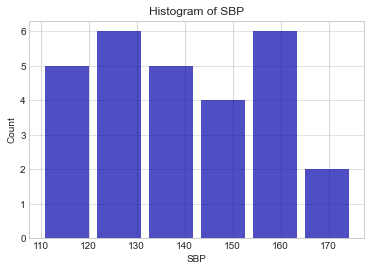

In [61]:
# Visualize the data
# Create a histogram with normal curve
# An "interface" to matplotlib.axes.Axes.hist() method
# Use funtion matplotlib.pyplot.hist(x, alpha=n)to plot histogram
# For more infomation:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
n, bins, patches = plt.hist(x=X, # Dataset to be visualized
                            bins='auto', # Automatically 
                            color='#0504aa', # We chose a specific color here
                            alpha=0.7, # Transparency
                            rwidth=0.85) # the bin width in display
plt.grid(axis='y', alpha=0.75) # Set the distance between horizontal lines and display the horizontal lines
plt.xlabel('SBP') # Label name in the x-axis
plt.ylabel('Count') # Label name in the y-axis
plt.title('Histogram of SBP')# Title name of the main plot
plt.show() # Show the plot in Notebooks

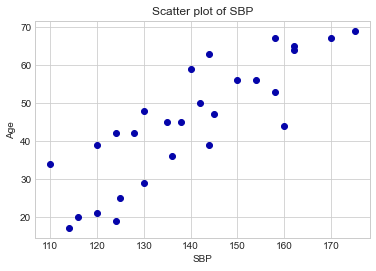

In [62]:
# Create a scatterplot to further visualice the relationship between
# SBP and Age
plt.style.use('seaborn-whitegrid') # Grid setting
plt.scatter(X, Y, color='#0504aa') # Same as the histogram function above cells, but this one creates a scatter plot
plt.xlabel('SBP')
plt.ylabel('Age')
plt.title('Scatter plot of SBP')
plt.show()

As you can see, there is a strongly positive correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the $R^2$ score using sckit-learn's ```.score()``` method.

In [63]:
# Built linear regression model
# Create model class. Currently the model has not been fitted yet.
slr_model = LinearRegression()
# Fit the model
slr_model.fit(X, Y)
# When we want to retrive some information in the fitted model
# we can use model_name.variableToBeRetrived_
intercept = slr_model.intercept_
slope = slr_model.coef_
print('intercept:', intercept)
print('slope:', slope)
# When we want to use the fitted model for prediction
# use the model_name.predict(test_data) function
y_pred = slr_model.predict(X)
# print('predicted response:', y_pred, sep='\n')
y_pred = intercept + slope * X

intercept: -59.85538876763905
slope: [0.75037069]


### Choose an evaluation metric
* We then need to compare these predictions with the actual result and measure them in some way.
* This is where the selection of evaluation metric is important. For regression, we measure the distance between the predicted and actual answers in some way. The shorter the distance, the more correct the model is. 
* We cover three common metrics below:
  * `Mean Absolute Error`: which provides a mean score for all the predicted versus actual values as an absolute value 
  * `Means Squared Error`: which provides a mean score for all the predicted versus actual values as a square of the absolute value
  * `R2`: which we recommend you research as an exercise to grow your knowledge. WIkipedia and `sklearn` document are a great place to start!


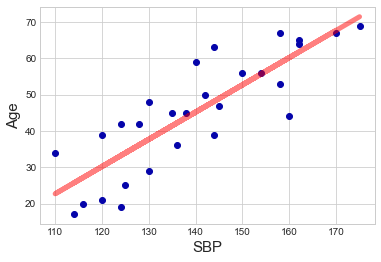

In [64]:
# Step 5: visualize regression
plt.xlabel('SBP', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.scatter(X, Y, color='#0504aa')
plt.plot(X, intercept + slope*X, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.show()

### Choose an evaluation metric
* We then need to compare these predictions with the actual result and measure them in some way.
* This is where the selection of evaluation metric is important. For regression, we measure the distance between the predicted and actual answers in some way. The shorter the distance, the more correct the model is. 
* We cover three common metrics below:
  * `Mean Absolute Error`: which provides a mean score for all the predicted versus actual values as an absolute value 
  * `Means Squared Error`: which provides a mean score for all the predicted versus actual values as a square of the absolute value
  * `R2`: the proportion of the variance in the dependent variable that is predictable from the independent variable(s)

In [65]:
# Obtain the value of MSE 
MSE = mean_squared_error(Y, y_pred)
print('MSE:', MSE)
# Obtain the value of MAE 
MAE = mean_absolute_error(Y, y_pred)
print('MAE:', MAE)
# Obtain the value of 𝑅² using .score()
r_sq = slr_model.score(X, Y)
slope = slr_model.coef_
intercept = slr_model.intercept_
print('R squrare:', r_sq)

MSE: 69.67565944959195
MAE: 7.093106571052525
R squrare: 0.7122099509065329


## Part 1: Multiple linear regression

In **Part 1**, you will work with a slightly more complicated clinical dataset that have been consolidated into one ```'CSV'``` file available in the data folder as ```'smoke.csv'```. Specifically, your goal will be to use this data to predict the effect of mother’s smoking during pregnancy (pack/day) and mother’s age at childbirth (years) on birth weight of their infants (oz).

In this section, you will learn how to examin the basic statistics and visualize the relationship between independent variables and split the dataset into ```train``` and ```test``` sets.

In [66]:
# Load data
health_df_2 = pd.read_csv('./data/smoke.csv')
# View data structure
health_df_2.head()

,ID,Mother_age,Mother_smoking,Birth_weight
0,1,18,1.0,110
1,2,23,1.3,97
2,3,34,2.0,88
3,4,19,2.0,92
4,5,22,1.4,105


In [67]:
# Pandas has a lot of functionality to assist with exploratory data analysis
# .describe() provide summary statistics on all numeric columns
print(health_df_2.describe())
# Similarly, you can also use this function df_name.info()
print(health_df_2.info())
# we can also see the shape of the data
print("\n The shape of dataset 2 is:", health_df_2.shape)

             ID  Mother_age  Mother_smoking  Birth_weight
count  20.00000   20.000000       20.000000      20.00000
mean   10.50000   24.900000        1.365000     103.00000
std     5.91608    6.290343        0.791584      27.25513
min     1.00000   16.000000        0.200000      22.00000
25%     5.75000   20.000000        0.775000      89.50000
50%    10.50000   22.500000        1.300000     102.50000
75%    15.25000   29.500000        2.000000     120.75000
max    20.00000   38.000000        3.000000     142.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              20 non-null     int64  
 1   Mother_age      20 non-null     int64  
 2   Mother_smoking  20 non-null     float64
 3   Birth_weight    20 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 768.0 bytes
None

 The shape of dataset 2 is: (20, 4)


In [68]:
# To fit the model into sk-learn build in models, we need to 
# preprocess the data format and dimension
X = health_df_2[['Mother_age', 'Mother_smoking']].to_numpy()
# You can try different ways to reshape this Y array
Y = health_df_2['Birth_weight'].to_numpy().reshape(-1, 1)

In [69]:
# Id is not needed in training/prediction process
# To simplify the dataset you can drop this column
df_2 = health_df_2.drop('ID', axis=1)

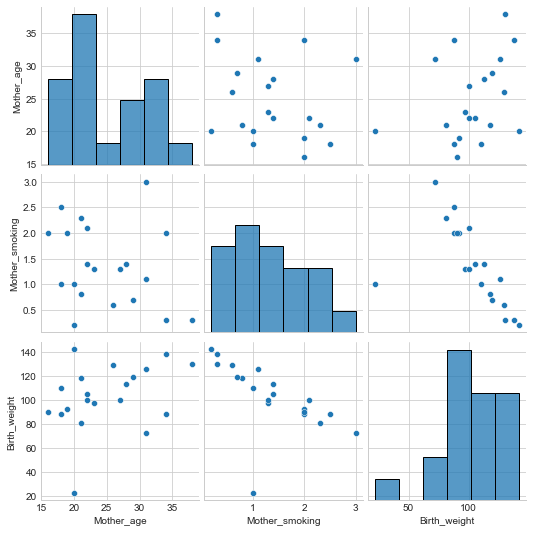

In [70]:
# We can plot the pairplot of variables
# Set grid
style.use('seaborn-whitegrid')
# Set figure size
plt.rcParams['figure.figsize'] = (20,10)
# Specify dataset to used
sns.pairplot(df_2)
# You can also save the plot
plt.savefig('pairplor_health_df_2.png')
# Display the generated plot
plt.show()

### Train/test split for regression
Train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In [71]:
# Split the data set into trianing and validation
X = df_2.drop("Birth_weight", axis = 1)
Y = df_2["Birth_weight"]
# Set random seed here so that you will get the same result as solution
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [72]:
# Since Mother smoking has a strong negative relationship
# with birth weight, we test a slm first
slr = LinearRegression()
# Dimension purpose
slr.fit(X_train.to_numpy(), y_train) 
# Call model prediction
y_pred = slr.predict(X_test.to_numpy())

In [73]:
# Evaluate slr model
# Obtain the value of R square
print(cl("R-Squared :", attrs = ["bold"]),
      slr.score(X_test.to_numpy(),
                y_test))
# Obtain the value of MSE 
MSE = mean_squared_error(y_test, y_pred)
print(cl("MSE:", attrs = ["bold"]), MSE)
# Obtain the value of MAE 
MAE = mean_absolute_error(y_test, y_pred)
print(cl("MAE:", attrs = ["bold"]), MAE)

R-Squared : 0.7866904643909651
MSE: 95.70932225857881
MAE: 9.058391515051955


## Part 2: Binary Logistic Regression
This part is modified from Harvard CS109A's lab 6 notebook:
https://harvard-iacs.github.io/2018-CS109A/labs/lab-6/student/

Linear regression is usually a good baseline model, but since the outcome we're trying to predict only takes values 0 and 1 we'll want to use logistic regression instead of basic linear regression.

In this section, you will use the clinical dataset from Ille-et-Vilaine Study of Oesophageal Cancer
- Cases: 200 men with oesophageal cancer (OC)
- Controls: 775 OC-free men randomly drawn from the same regions.
- Primary Interest: To assess associations between alcohol and tobacco consumptions and oesophageal cancer incidence.


In [74]:
# Load model package
from sklearn.linear_model import LogisticRegression
# Evaluation metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score

In [75]:
# Read-in and checking
oesophageal_df = pd.read_csv("data/oesophageal.csv", index_col=0)
# Please examine the first 6 rows of the dataset use method in previous 
# data checking process
oesophageal_df.head() # Leave this line blank for exercise

,alcohol,tobacco,case,freq
agegrp,,,,
1,0,1,0,40
1,0,2,0,10
1,0,3,0,6
1,0,4,0,5
1,0,1,1,0


In [76]:
# Please view the dataset summary matrix with the method in previous 
# data checking process
oesophageal_df.describe() # Leave this line blank for exercise

,alcohol,tobacco,case,freq
count,92.00000,92.000000,92.00000,92.000000
mean,0.50000,2.456522,0.50000,8.369565
std,0.50274,1.123310,0.50274,12.015299
min,0.00000,1.000000,0.00000,0.000000
25%,0.00000,1.000000,0.00000,1.000000
50%,0.50000,2.000000,0.50000,4.000000
75%,1.00000,3.000000,1.00000,10.000000
max,1.00000,4.000000,1.00000,60.000000


In [77]:
# Split the data set into trianing and validation
# Time to practise! Please separate the read-in data
# into training and testing sets
X = oesophageal_df.drop("case", axis = 1) # Leave this line blank for exercise
Y = oesophageal_df["case"] # Leave this line blank for exercise
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # Leave this line blank for exercise
# Double check whether you have successfully 
# separate training and testing sets
X_train.head()

,alcohol,tobacco,freq
agegrp,,,
2,1,3,1
3,1,2,17
4,0,3,3
1,0,3,0
3,1,4,2


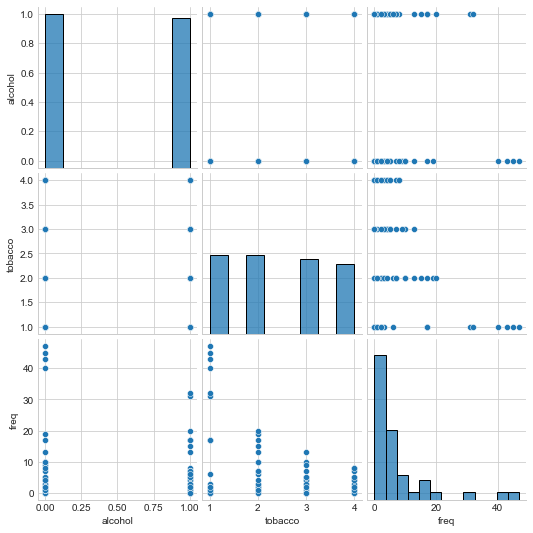

In [78]:
# Visualize your training data
# Leave following cell blank for exercise
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)
sns.pairplot(X_train)
plt.savefig('pairplor_oesophageal_df_X_train.png')
plt.show()

Model building part

We'll begin with statsmodels, because this package allow us to compute confidence intervals and check that coefficients make sense or not.

In [79]:
#‘lbfgs’ solver handles multinomial loss in multiclass problems 
logreg_model = LogisticRegression(solver='lbfgs', class_weight="balanced").fit(X_train, y_train)

In [80]:
y_preds_train = logreg_model.predict(X_train)
y_preds_test = logreg_model.predict(X_test)

full_logreg_score_train = accuracy_score(y_train, y_preds_train)
full_logreg_score_test = accuracy_score(y_test, y_preds_test)

# Evaluation
print('Training Set Score: {}'.format(full_logreg_score_train))
print('Test Set Score: {}'.format(full_logreg_score_test))

Training Set Score: 0.821917808219178
Test Set Score: 0.6842105263157895


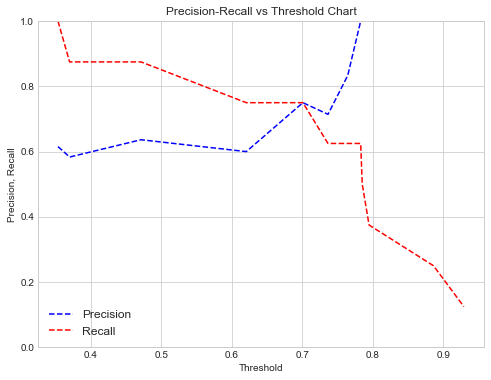

In [81]:
# probs_y is a 2-D array of probability of being labeled as
# 0 (first column of array) vs 1 (2nd column in array)
probs_y = logreg_model.predict_proba(X_test)
# Retrieve probability of being 1(in second column of probs_y)
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 
# Similar as plots in above sections
plt.rcParams['figure.figsize'] = (8,6)
plt.title("Precision-Recall vs Threshold Chart")
# Plot dash lines
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
# Specify legend location and size
plt.legend(loc="lower left",fontsize = "large")
plt.ylim([0,1])
plt.show()

AUC: 0.8687104562104562


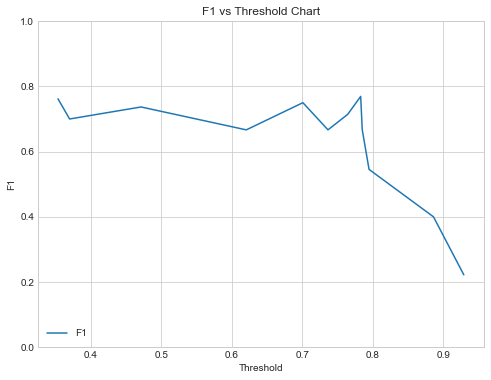

In [82]:
F1 = 2 * (precision * recall) / (precision + recall)
pr_auc = auc(recall, precision)
print("AUC:", pr_auc)
# Similar as plots in above sections
# plt.title("AUC vs Threshold Chart")
plt.rcParams['figure.figsize'] = (8,6)
plt.title("F1 vs Threshold Chart")
# Plot lines
plt.plot(thresholds, F1[:-1], label="F1")
plt.ylabel("F1")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()

As can be observed from the above matrix
TP = True Positives = 7 (upper left)

TN = True Negatives = 6 (lower right)

FP = False Positives = 4 (lower left)

FN = False Negatives = 2 (upperight)

You can then get the Accuracy using:

Accuracy = (TP+TN)/Total = (7+6)/19 = 1

The accuracy is therefore 68% for the test set.

In [83]:
# Another way to check the accuracy is shown below, 
# using accuracy_score() method.
accuracy_score(y_test, y_preds_test) 

0.6842105263157895

## Part 3: Ridge Regression
Ridge regression is a regression technique that is quite similar to unadorned least squares linear regression: simply adding an $\ell_2$ **penalty** on the parameters $\beta$ to the objective function for linear regression yields the objective function for ridge regression.

Our goal is to find an assignment to $\beta$ that minimizes the function

$$f(\beta) = \|X\beta - Y\|_2^2 + \lambda \|\beta\|_2^2,$$

where $\lambda$ is a hyperparameter and, as usual, $X$ is the training data and $Y$ the observations. In practice, we tune $\lambda$ until we find a model that generalizes well to the test data.

In this section, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preproces

In [84]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://newonlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/lesson04/ridge_regression_geomteric/index.png')

In [85]:
# For k-fold cv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Load model
from sklearn.linear_model import Ridge
# Cross validation
from sklearn.model_selection import cross_validate

In [86]:
# Load dataset
gm_df = pd.read_csv('./data/gm_2008_region.csv')

In [87]:
gm_df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


## Clean data
The dataset may contain a few unknown values. If that is the case, we can use dataset.dropna() function to do data cleaning.

In [88]:
gm_df.drop(labels=['Region'], axis='columns', inplace=True)
gm_df.isna().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
dtype: int64

To create a cleaner dataset, we will drop some columns and remove NaN values manually

In [89]:
# We create a subdataset based on the previous one
# Split the data set into trianing and validation
X = gm_df.drop('life', axis='columns').values
y = gm_df['life'].values

A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

- A model is trained using  of the folds as training data;

- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

Reference: https://scikit-learn.org/stable/modules/cross_validation.html

In [90]:
Image(url='https://scikit-learn.org/stable/_images/grid_search_workflow.png')

In [91]:
Image(url='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png')

In [92]:
# we create this function to plot alpha with the error range
def display_plot(cv_scores, cv_scores_std, alpha_space):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    ax.set_title('CV Score and std error region vs Alpha')

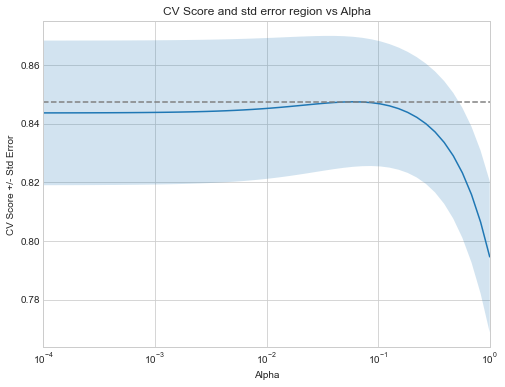

In [93]:
# Try to test different range of alpha 
# alpha_space = [1e-3, 1e-2, 3e-2, 5e-2, 1e-1, 1, 3, 5, 10]
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:
    
    # Specify the alpha value to use: ridge.alhpa
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))
    
# Display the plot
display_plot(ridge_scores, ridge_scores_std, alpha_space)

In [94]:
# It seems like alpha = 0.5-0.9 work well for the ridge regression model
# So let's try with some different value of alphas
alpha = 0.6

In [95]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

In [96]:
# Define ridge regression model
ridge_model = Ridge(normalize=True)
ridge_model.alpha = 0.6
# Fit the model
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.6, normalize=True)

In [97]:
# Make a prediction
y_pred = ridge_model.predict(X_test)

Model evaluation

In [98]:
# Obtain the value of MSE 
MSE = mean_squared_error(y_test, y_pred)
print('MSE:', MSE)
# Obtain the value of MAE 
MAE = mean_absolute_error(y_test, y_pred)
print('MAE:', MAE)
R2 = ridge_model.score(X_test, y_test)
print("R2:", R2)

MSE: 13.89849137862531
MAE: 2.895737910879879
R2: 0.8127018029710407


## Part 4: Naive Bayes
reference:

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb#scrollTo=-NJHDvC9xpc-

In [125]:
# Import dataset stimulation package
from sklearn.datasets import make_blobs
# Model package
from sklearn.naive_bayes import GaussianNB
# Decision boundary
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
# Evaluation metrics
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

Now we will implement the model on clinical data

In [126]:
nb_df = pd.read_csv("./data/NB_dataset.txt", delimiter=',')
nb_df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [127]:
# Exercise: try to view the summary table for this dataset

# Solution:
print(nb_df.describe())
print(nb_df.info())

          glucose  bloodpressure    diabetes
count  995.000000     995.000000  995.000000
mean    44.306533      79.184925    0.500503
std      6.707567       9.340204    0.500251
min     20.000000      50.000000    0.000000
25%     40.000000      72.000000    0.000000
50%     45.000000      80.000000    1.000000
75%     50.000000      87.000000    1.000000
max     70.000000     100.000000    1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB
None


Before feeding the data to the naive Bayes classifier model, we need to do some pre-processing.
Here, we’ll create the x and y variables by taking them from the dataset and using the train_test_split function of scikit-learn to split the data into training and test sets.

In [128]:
X = nb_df[["glucose", "bloodpressure"]]
y = nb_df["diabetes"]

In [129]:
# Exercise: try to split the dataset into training and validation set with 
# test_size = 0.25 and random_sate = 1

# Solution:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1) # Leave this line blank for exercise

In [130]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1])

**Model Evaluation**

Finally, we need to check to see how well our model is performing on the test data. For this, we evaluate our model by finding the accuracy score produced by the model.

In [131]:
accuracy = accuracy_score(y_pred, y_test)*100
f1 = f1_score(y_test, y_pred)
# Avoid using variables with the same name as a function
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_value = auc(fpr, tpr)

In [132]:
print("Accuracy: ", accuracy)
print("F1: ", f1)
print("AUC: ", auc_value)

Accuracy:  94.77911646586345
F1:  0.9465020576131686
AUC:  0.9482191250483932


**Optional Exercise:**

- Use the Oesophageal Cancer dataset that we used in binary logistic regression to train an Naive Bayes model 
- Compare the model performance

In [133]:
X = oesophageal_df.drop("case", axis = 1)
Y = oesophageal_df["case"]
# Split train and validation set (Python is case sensitive, pay attention to y & Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) 

In [134]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
# Dimensional purpose
y_test = y_test.to_numpy().reshape(-1, 1)

In [135]:
accuracy = accuracy_score(y_pred, y_test)*100
f1 = f1_score(y_test, y_pred)
# Avoid using variables with the same name as a function
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_value = auc(fpr, tpr)

In [136]:
print("Accuracy: ", accuracy)
print("F1: ", f1)
print("AUC: ", auc_value)

Accuracy:  68.42105263157895
F1:  0.7000000000000001
AUC:  0.7102272727272727
